In [18]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import statsmodels.api as sm

from sklearn.model_selection import KFold
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import OneHotEncoder


df = pd.read_csv("../data/part1/part1_daily.csv")
df['datetime'] = pd.to_datetime(df['datetime'], yearfirst=True)
df.set_index('datetime', inplace=True)
df['weekday'] = df.index.to_series().dt.weekday.astype('category')


df_recent_daegu = df[(df.index >= '2020-02-17') & (df['region'] == '대구') | ('2019-12-07' <= df.index) & (df.index < '2020-02-17')]
df_recent_kr = df[(df.index >= '2019-12-07') & (df['region'] != '대구')]

hot_encoder = OneHotEncoder(handle_unknown='ignore')
hot_df = pd.DataFrame(hot_encoder.fit_transform(df_recent_daegu[['weekday']]).toarray())
df_recent_daegu = df_recent_daegu.join(hot_df,  on="weekday")

###  Passengers versus Daegu new cases


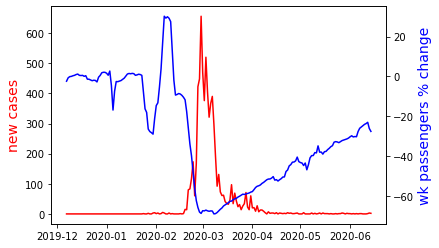

In [19]:
# create figure and axis objects with subplots()
fig, ax = plt.subplots()
# make a plot
ax.plot(df_recent_daegu.index, df_recent_daegu['new'], color="red")
# ax.plot(df_recent_daegu.index, df_recent_daegu['active'], color="orange")
# set x-axis label
# ax.set_xlabel("date",fontsize=14)
ax.fmt_xdata = mdates.DateFormatter("%m")
# set y-axis label
ax.set_ylabel("new cases",color="red",fontsize=14)

# twin object for two different y-axis on the sample plot
ax2 = ax.twinx()
# make a plot with different y-axis using second axis object
ax2.plot(df_recent_daegu.index, df_recent_daegu["weekly_passengers_1y_change"],color="blue")
# ax2.fmt_xdata = mdates.DateFormatter("%m")
ax2.set_ylabel("wk passengers % change",color="blue",fontsize=14)
plt.savefig('../plots/part1/bus_daegu_new_cases.png')
plt.show()
# save the plot as a file
# fig.savefig('two_different_y_axis_for_single_python_plot_with_twinx.jpg',
#             format='jpeg',
#             dpi=100,
#             bbox_inches='tight')

###  Passengers versus Daegu new cases (Peak)


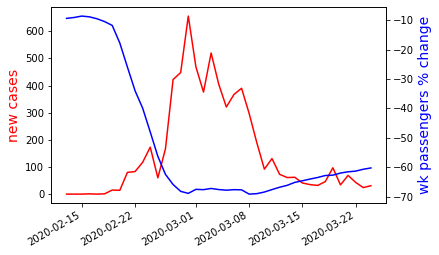

In [20]:
df_peak_daegu = df_recent_daegu[('2020-02-13' <= df_recent_daegu.index) & (df_recent_daegu.index < '2020-03-25')]

# create figure and axis objects with subplots()
fig, ax = plt.subplots()
# make a plot
ax.plot(df_peak_daegu.index, df_peak_daegu['new'], color="red")
# ax.plot(df_recent_daegu.index, df_recent_daegu['active'], color="orange")
# set x-axis label
# ax.set_xlabel("date",fontsize=14)
ax.fmt_xdata = mdates.DateFormatter("%m")
# set y-axis label
ax.set_ylabel("new cases",color="red",fontsize=14)

# twin object for two different y-axis on the sample plot
ax2 = ax.twinx()
# make a plot with different y-axis using second axis object
ax2.plot(df_peak_daegu.index, df_peak_daegu["weekly_passengers_1y_change"],color="blue")
# ax2.fmt_xdata = mdates.DateFormatter("%m")
ax2.set_ylabel("wk passengers % change",color="blue",fontsize=14)

fig.autofmt_xdate()
plt.savefig('../plots/part1/bus_daegu_new_cases_peak.png')
plt.show()
# save the plot as a file
# fig.savefig('two_different_y_axis_for_single_python_plot_with_twinx.jpg',
#             format='jpeg',
#             dpi=100,
#             bbox_inches='tight')


###  Passengers versus Daegu new cases percentage change (Peak)


/Users/jjh/.conda/envs/CoronaDaeguProject/lib/python3.6/site-packages/pandas/core/series.py:679: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/Users/jjh/.conda/envs/CoronaDaeguProject/lib/python3.6/site-packages/pandas/core/series.py:679: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


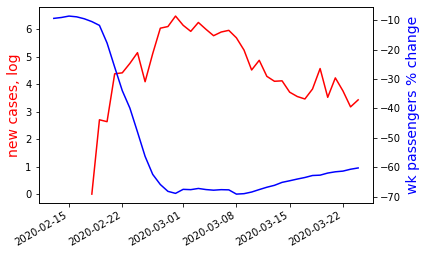

Coefficients: 
 [-8.08012029]
Mean squared error: 160.09
Coefficient of determination: 0.41


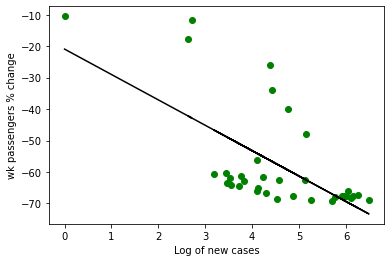

In [21]:
df_peak_daegu = df_recent_daegu[('2020-02-13' <= df_recent_daegu.index) & (df_recent_daegu.index < '2020-03-25')]

# create figure and axis objects with subplots()
fig, ax = plt.subplots()
# make a plot
ax.plot(df_peak_daegu.index, np.log(df_peak_daegu['new']), color="red")
# ax.plot(df_recent_daegu.index, df_recent_daegu['active'], color="orange")
# set x-axis label
# ax.set_xlabel("date",fontsize=14)
ax.fmt_xdata = mdates.DateFormatter("%m")
# set y-axis label
ax.set_ylabel("new cases, log",color="red",fontsize=14)

# twin object for two different y-axis on the sample plot
ax2 = ax.twinx()
# make a plot with different y-axis using second axis object
ax2.plot(df_peak_daegu.index, df_peak_daegu["weekly_passengers_1y_change"],color="blue")
# ax2.fmt_xdata = mdates.DateFormatter("%m")
ax2.set_ylabel("wk passengers % change",color="blue",fontsize=14)

fig.autofmt_xdate()
plt.savefig('../plots/part1/bus_daegu_new_cases_log_peak.png')
plt.show()
# save the plot as a file
# fig.savefig('two_different_y_axis_for_single_python_plot_with_twinx.jpg',
#             format='jpeg',
#             dpi=100,
#             bbox_inches='tight')


Y =  df_peak_daegu['weekly_passengers_1y_change'].values[5:]
X = np.log(df_peak_daegu['new'])[5:].values.reshape(-1, 1)

regr = LinearRegression()
regr.fit(X, Y)
Y_pred = regr.predict(X)

# The coefficients
print('Coefficients: \n', regr.coef_)
# The mean squared error
print('Mean squared error: %.2f'
      % mean_squared_error(Y, Y_pred))
# The coefficient of determination: 1 is perfect prediction
print('Coefficient of determination: %.2f'
      % r2_score(Y, Y_pred))

# create figure and axis objects with subplots()
fig, ax = plt.subplots()

ax.scatter(X, Y, color='g')
ax.plot(X, Y_pred, color='k')

ax.set_xlabel("Log of new cases")
ax.set_ylabel("wk passengers % change")

plt.savefig('../plots/part1/bus_daegu_peak_log_new_regression.png')

plt.show()


In [23]:
Y =  df_peak_daegu['weekly_passengers_1y_change'].values[5:]
X = pd.concat([np.log(df_peak_daegu['new'])[5:], df_peak_daegu[0][5:]], axis=1)
for d in range(1,7):
    X = pd.concat([X, df_peak_daegu[d][5:]], axis=1)

regr = LinearRegression()
regr.fit(X, Y)
Y_pred = regr.predict(X)

# The coefficients
print('Coefficients: \n', regr.coef_)
# The mean squared error
print('Mean squared error: %.2f'
      % mean_squared_error(Y, Y_pred))
# The coefficient of determination: 1 is perfect prediction
print('Coefficient of determination: %.2f'
      % r2_score(Y, Y_pred))

# # create figure and axis objects with subplots()
# fig, ax = plt.subplots()
#
# ax.scatter(X, Y, color='g')
# ax.plot(X, Y_pred, color='k')
#
# ax.set_xlabel("Log of new cases")
# ax.set_ylabel("wk passengers % change")

# plt.savefig(
#     '../plots/part1/bus_daegu_peak_log_new_regression.png')

# plt.show()

Coefficients: 
 [-8.60974218  2.73038979  2.33743393  1.76399594  2.36982708 -0.66253188
 -3.78481962 -4.75429524]
Mean squared error: 151.77
Coefficient of determination: 0.45


###  Passengers versus Daegu active cases



In [ ]:
# create figure and axis objects with subplots()
fig, ax = plt.subplots()
# make a plot
# ax.plot(df_recent_daegu.index, df_recent_daegu['new'], color="red")
ax.plot(df_recent_daegu.index, df_recent_daegu['active'], color="orange")
# set x-axis label
# ax.set_xlabel("date",fontsize=14)
ax.fmt_xdata = mdates.DateFormatter("%m")
# set y-axis label
ax.set_ylabel("active cases",color="red",fontsize=14)

# twin object for two different y-axis on the sample plot
ax2 = ax.twinx()
# make a plot with different y-axis using second axis object
ax2.plot(df_recent_daegu.index, df_recent_daegu["weekly_passengers_1y_change"],color="blue")
# ax2.fmt_xdata = mdates.DateFormatter("%m")
ax2.set_ylabel("wk passengers % change",color="blue",fontsize=14)
fig.autofmt_xdate()

plt.show()
# save the plot as a file
# fig.savefig('two_different_y_axis_for_single_python_plot_with_twinx.jpg',
#             format='jpeg',
#             dpi=100,
#             bbox_inches='tight')

###  Passengers versus Daegu active cases (peak)



In [ ]:
# create figure and axis objects with subplots()
fig, ax = plt.subplots()
# make a plot
# ax.plot(df_recent_daegu.index, df_recent_daegu['new'], color="red")
ax.plot(df_peak_daegu.index, df_peak_daegu['active'], color="orange")
# set x-axis label
# ax.set_xlabel("date",fontsize=14)
ax.fmt_xdata = mdates.DateFormatter("%m")
# set y-axis label
ax.set_ylabel("active cases",color="red",fontsize=14)

# twin object for two different y-axis on the sample plot
ax2 = ax.twinx()
# make a plot with different y-axis using second axis object
ax2.plot(df_peak_daegu.index, df_peak_daegu["weekly_passengers_1y_change"],color="blue")
# ax2.fmt_xdata = mdates.DateFormatter("%m")
ax2.set_ylabel("wk passengers % change",color="blue",fontsize=14)
fig.autofmt_xdate()

plt.savefig('../plots/part1/bus_daegu_active_cases_peak.png')
plt.show()
# save the plot as a file
# fig.savefig('two_different_y_axis_for_single_python_plot_with_twinx.jpg',
#             format='jpeg',
#             dpi=100,
#             bbox_inches='tight')

###  Passengers versus Korea new cases

In [ ]:

# create figure and axis objects with subplots()
fig, ax = plt.subplots()
# make a plot
ax.plot(df_recent_kr.index, df_recent_kr['new'], color="red")
# ax.plot(df_recent_kr.index, df_recent_kr['active'], color="orange")
# set x-axis label
# # ax.set_xlabel("date",fontsize=14)
ax.fmt_xdata = mdates.DateFormatter("%m")
# set y-axis label
ax.set_ylabel("new cases (Korea)",color="red",fontsize=14)

# twin object for two different y-axis on the sample plot
ax2 = ax.twinx()
# make a plot with different y-axis using second axis object
ax2.plot(df_recent_kr.index, df_recent_daegu["weekly_passengers_1y_change"],color="blue")
# ax2.fmt_xdata = mdates.DateFormatter("%m")
ax2.set_ylabel("wk passengers % change",color="blue",fontsize=14)

fig.autofmt_xdate()

plt.savefig('../plots/part1/bus_korea_new_cases.png')
plt.show()
# save the plot as a file
# fig.savefig('two_different_y_axis_for_single_python_plot_with_twinx.jpg',
#             format='jpeg',
#             dpi=100,
#             bbox_inches='tight')




In [ ]:


# create figure and axis objects with subplots()
fig, ax = plt.subplots()
# make a plot
# ax.plot(df_recent_kr.index, df_recent_kr['new'], color="red")
ax.plot(df_recent_kr.index, df_recent_kr['active'], color="orange")
# set x-axis label
# ax.set_xlabel("date",fontsize=14)
ax.fmt_xdata = mdates.DateFormatter("%m")
# set y-axis label
ax.set_ylabel("new cases",color="red",fontsize=14)

# twin object for two different y-axis on the sample plot
ax2 = ax.twinx()
# make a plot with different y-axis using second axis object
ax2.plot(df_recent_kr.index, df_recent_daegu["weekly_passengers_1y_change"],color="blue")
# ax2.fmt_xdata = mdates.DateFormatter("%m")
ax2.set_ylabel("wk passengers % change",color="blue",fontsize=14)
plt.show()
# save the plot as a file
# fig.savefig('two_different_y_axis_for_single_python_plot_with_twinx.jpg',
#             format='jpeg',
#             dpi=100,
#             bbox_inches='tight')




In [ ]:
df_recent_daegu['new'].plot()
plt.show()

###  Passengers versus Daegu new cases (Recovery)


In [ ]:

df_recovery_daegu = df_recent_daegu[('2020-02-26' <= df_recent_daegu.index)]

# create figure and axis objects with subplots()
fig, ax = plt.subplots()
# make a plot
ax.plot(df_recovery_daegu.index, df_recovery_daegu['new'], color="red")
# ax.plot(df_recent_daegu.index, df_recent_daegu['active'], color="orange")
# set x-axis label
# ax.set_xlabel("date",fontsize=14)
ax.fmt_xdata = mdates.DateFormatter("%m")
# set y-axis label
ax.set_ylabel("new cases",color="red",fontsize=14)

# twin object for two different y-axis on the sample plot
ax2 = ax.twinx()
# make a plot with different y-axis using second axis object
ax2.plot(df_recovery_daegu.index, df_recovery_daegu["weekly_passengers_1y_change"],color="blue")
# ax2.fmt_xdata = mdates.DateFormatter("%m")
ax2.set_ylabel("wk passengers % change",color="blue",fontsize=14)

fig.autofmt_xdate()
plt.savefig('../plots/part1/bus_daegu_new_cases_recovery.png')
plt.show()
# save the plot as a file
# fig.savefig('two_different_y_axis_for_single_python_plot_with_twinx.jpg',
#             format='jpeg',
#             dpi=100,
#             bbox_inches='tight')

# create figure and axis objects with subplots()
fig, ax = plt.subplots()

# make a plot with different y-axis using second axis object
ax.plot(df_recovery_daegu.index, df_recovery_daegu["weekly_passengers_1y_change"],color="blue")
# ax2.fmt_xdata = mdates.DateFormatter("%m")
ax.set_ylabel("wk passengers % change",color="blue",fontsize=14)
fig.autofmt_xdate()
plt.savefig('../plots/part1/bus_daegu_recovery.png')
plt.show()
# save the plot as a file
# fig.savefig('two_different_y_axis_for_single_python_plot_with_twinx.jpg',
#             format='jpeg',
#             dpi=100,
#             bbox_inches='tight')

### Recovery Linear Time Regression



In [ ]:
df_recovery_daegu = df_recent_daegu[('2020-03-08' <= df_recent_daegu.index)]

Y =  df_recovery_daegu['weekly_passengers_1y_change']
X = df_recovery_daegu.index.factorize()[0].reshape(-1, 1)

regr = LinearRegression()
regr.fit(X, Y)
Y_pred = regr.predict(X)

# The coefficients
print('Coefficients: \n', regr.coef_)
# The mean squared error
print('Mean squared error: %.2f'
      % mean_squared_error(Y, Y_pred))
# The coefficient of determination: 1 is perfect prediction
print('Coefficient of determination: %.2f'
      % r2_score(Y, Y_pred))

# create figure and axis objects with subplots()
fig, ax = plt.subplots()

ax.scatter(X, Y, color='g')
ax.plot(X, Y_pred, color='k')

ax.set_xlabel("Days since March 8")
ax.set_ylabel("wk passengers % change")

plt.savefig('../plots/part1/bus_daegu_recovery_time_regression.png')

plt.show()



###  Passengers versus Daegu new cases (Recovery Peaks Investigation)


In [ ]:
df_recovery_mid_daegu = df_recent_daegu[('2020-04-18' <= df_recent_daegu.index) & ('2020-05-22' > df_recent_daegu.index)]
df_recovery_mid_kr = df_recent_kr[('2020-04-18' <= df_recent_kr.index) & ('2020-05-22' > df_recent_kr.index)]

# create figure and axis objects with subplots()
fig, ax = plt.subplots()
# make a plot
ax.plot(df_recovery_mid_kr.index, df_recovery_mid_kr['new'], color="red")
# ax.plot(df_recent_daegu.index, df_recent_daegu['active'], color="orange")
# set x-axis label
# ax.set_xlabel("date",fontsize=14)
ax.fmt_xdata = mdates.DateFormatter("%m")
# set y-axis label
ax.set_ylabel("new cases",color="red",fontsize=14)

# twin object for two different y-axis on the sample plot
ax2 = ax.twinx()
# make a plot with different y-axis using second axis object
ax2.plot(df_recovery_mid_daegu.index, df_recovery_mid_daegu["weekly_passengers_1y_change"],color="blue")
# ax2.fmt_xdata = mdates.DateFormatter("%m")
ax2.set_ylabel("wk passengers % change",color="blue",fontsize=14)

fig.autofmt_xdate()
plt.savefig('../plots/part1/bus_daegu_new_cases_recovery_mid.png')
plt.show()

Regression for bumps

In [ ]:

for days_shift in range(3, 4):
    X = pd.concat([df_recovery_mid_kr['new'].shift(days_shift)[days_shift:]], axis=1)
    Y = df_recovery_mid_daegu['weekly_passengers_1y_change'].diff()[days_shift:]

    regr = LinearRegression()
    regr.fit(X, Y)
    Y_pred = regr.predict(X)

    print('Intercept: \n', regr.intercept_)
    print('Coefficients: \n', regr.coef_)

    fig, ax = plt.subplots()

    ax.scatter(X, Y)
    ax.plot(X, Y_pred, color='red')
    ax.set_xlabel("New cases (Korea)")
    ax.set_ylabel("Passengers % daily change")
    plt.savefig('../plots/part1/bus_korea_new_cases_recovery_mid_regression_scatter.png')


    plt.show()

    print(f'r_sqr value: {regr.score(X, Y)}')

X = pd.concat([df_recovery_mid_kr['new'].shift(2)[3:], df_recovery_mid_kr['new'].shift(3)[3:]], axis=1)
Y = df_recovery_mid_daegu['weekly_passengers_1y_change'].diff()[3:]

regr = LinearRegression()
regr.fit(X, Y)
Y_pred = regr.predict(X)

print('Intercept: \n', regr.intercept_)
print('Coefficients: \n', regr.coef_)

print(f'r_sqr value: {regr.score(X, Y)}')

X_SM = X.to_numpy()
X_SM = sm.add_constant(X_SM)
Y_SM = Y.to_numpy()
sm_model = sm.OLS(Y_SM, X_SM)
results = sm_model.fit()
print(results.summary())